# main

In [18]:
from ultimatetictactoe import ultimatetictactoe
from utils.board import BoardRotation, BoardReflection
from rl.agent import RandomAgent, NeuralAgent, ManualAgent, Policy, async_compute_games
from rl.independent_algo.reinforce import *
# from algo.base_algo.base_algo import state_to_tensor
from utils.plot_utils import plot_comp, plot_val, extract_vlt

import torch
from torch import nn
import torch.optim as optim

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import random
import pygame

from rl.agent import state_to_tensor

import pickle

In [11]:
t = torch.tensor([0.9, 0.1])
temp = 0.7
torch.softmax(t*temp, dim=-1)

tensor([0.6365, 0.3635])

In [ ]:
# path = r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_01_30_05\params.pkl"
path1 = r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_04_57_04\params.pkl"
path2 = r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_10_44_59\params.pkl"
path3 = r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_15_44_17\params.pkl"
path4 = r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_21_02_25_41\params.pkl"
# # path = r"res.pkl"

In [3]:
path = r".\rl\independent_algo\logs\checkpoints\slow_l_low_e\2026_02_21_22_09_08\params.pkl"
path = r".\rl\independent_algo\logs\checkpoints\slow_l_low_e\2026_02_21_17_43_05\params.pkl"
with open(path, 'rb') as file:
    params = pickle.load(file)
params

{'num_episodes': 9101,
 'gamma': 0.99,
 'update1': True,
 'update2': True,
 'enable_swap': True,
 'enable_transform': True,
 'px': 0.0,
 'pt': 0.0,
 'max_semi_turn': 15,
 'checkpoint_rate': 100,
 'validation_rate': 100,
 'weights_path': '',
 'weights_name': '',
 'device': device(type='cpu'),
 'starting_epoch_name': 0,
 'agent_1_epsilon': 0.3,
 'agent_1_learning_power': 0.0,
 'agent_1_learning_const': 1e-06,
 'agent_1_exploration_power': 0.0,
 'agent_1_exploration_const': 1.0,
 'agent_2_epsilon': 0.3,
 'agent_2_learning_power': 0.0,
 'agent_2_learning_const': 1e-06,
 'agent_2_exploration_power': 0.0,
 'agent_2_exploration_const': 1.0,
 'agent_1': 'Policy(\n  (first_conv_net): Sequential(\n    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))\n    (1): LazyBatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)\n    (2): ReLU()\n    (3): LazyConv2d(0, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))\n    (4): LazyBatchNorm2d(0, eps=1e-05, m

In [76]:
env = ultimatetictactoe.env(render_mode="rgb_array")
env.reset(42)

envh = ultimatetictactoe.env(render_mode="human")
envh.reset()
# envh.render()

In [78]:
eps = 0.3
a1 = NeuralAgent("player_1", epsilon=eps, learning_power=6, exploration_power=2, exploration_const=1.7)
a2 = NeuralAgent("player_2", epsilon=eps, learning_power=10.5, exploration_power=1, exploration_const=0.9, learning_const=10)
print(f"exploration agent 1 {eps**2}")
print(f"exploration agent 2 {eps**1}")
print(f"learning rate agent 1 {eps**6}")
print(f"learning rate agent 2 {eps**10.5}")
am = ManualAgent("player_1")
ar = RandomAgent("player_2")

exploration agent 1 0.09
exploration agent 2 0.3
learning rate agent 1 0.0007289999999999998
learning rate agent 2 3.234246929812254e-06


In [93]:
a1.policy_net.load_state_dict(torch.load(r"rl\independent_algo\logs\checkpoints\refined_mixed_const\2026_02_22_00_14_51\agent_2\model_39300.pt"))
# a2.policy_net.load_state_dict(torch.load("rl/independent_algo/logs/checkpoints/base_long_run/2026_02_20_10_44_59/agent_2/model_11900.pt"))

<All keys matched successfully>

# REINFORCE

In [16]:
_ = a1.policy_net.train()
_ = a2.policy_net.train()
a1.disable_epsilon(True)

In [ ]:
# training
# 10_000 1h 15m
a1_losses, a2_losses, a, b, c = reinforce(env, a1, a2, 5000, enable_swap=True, enable_transform=True, px=0, pt=0, checkpoint_rate=100, validation_rate=100, experiment_name="const")

100%|██████████| 5000/5000 [1:09:08<00:00,  1.21it/s]  


# Analyze RESULTS

## load res

In [19]:
def results_from_path(path):
    with open(path, 'rb') as file:
        res = pickle.load(file)
    return res

In [348]:
# run with paper and constants
path1 = r".\rl\independent_algo\logs\checkpoints\mixed_const\2026_02_20_04_57_04\es.pkl"
path2 = r".\rl\independent_algo\logs\checkpoints\mixed_const\2026_02_20_10_44_59\es.pkl"
path3 = r".\rl\independent_algo\logs\checkpoints\mixed_const\2026_02_21_02_25_41\res.pkl"
# run fast low
path4 = r".\rl\independent_algo\logs\checkpoints\base_long_run_fast\2026_02_20_19_38_08\res.pkl"
path5 = r".\rl\independent_algo\logs\checkpoints\base_long_run_fast\2026_02_20_23_53_55\res.pkl"
path6 = r".\rl\independent_algo\logs\checkpoints\base_long_run_fast\2026_02_21_05_33_33\res.pkl"
# run slow high
path7 = r".\rl\independent_algo\logs\checkpoints\base_long_run_slow\2026_02_21_11_02_13\res.pkl"
path8 = r".\rl\independent_algo\logs\checkpoints\base_long_run_slow\2026_02_21_13_04_08\res.pkl"
# run fast high
path_fast_high_1 = r".\rl\independent_algo\logs\checkpoints\fast_l_high_e\2026_02_21_15_17_55\res.pkl"
path_fast_high_2 = r".\rl\independent_algo\logs\checkpoints\fast_l_high_e\2026_02_21_20_16_55\res.pkl"
path_fast_high_3 = r".\rl\independent_algo\logs\checkpoints\fast_l_high_e\2026_02_22_11_41_02\res.pkl"
path_fast_high_4 = r".\rl\independent_algo\logs\checkpoints\fast_l_high_e\2026_02_22_15_08_30\res.pkl"
path_fast_high_5 = r".\rl\independent_algo\logs\checkpoints\fast_l_high_e\2026_02_22_18_28_19\res.pkl"
# # run slow low
path_slow_low_1 = r".\rl\independent_algo\logs\checkpoints\slow_l_low_e\2026_02_21_22_09_08\res.pkl"
path_slow_low_2 = r".\rl\independent_algo\logs\checkpoints\slow_l_low_e\2026_02_22_14_59_29\res.pkl"
# # path = r"res.pkl"
pathf = r".\rl\independent_algo\logs\checkpoints\refined_mixed_const\2026_02_22_00_14_51\res.pkl"

res1 = results_from_path(path1)
res2 = results_from_path(path2)
res3 = results_from_path(path3)
res4 = results_from_path(path4)
res5 = results_from_path(path5)
res6 = results_from_path(path6)
res7 = results_from_path(path7)
res8 = results_from_path(path8)
res_fast_high_1 = results_from_path(path_fast_high_1)
res_fast_high_2 = results_from_path(path_fast_high_2)
res_fast_high_3 = results_from_path(path_fast_high_3)
res_fast_high_4 = results_from_path(path_fast_high_4)
res_fast_high_5 = results_from_path(path_fast_high_5)
res_slow_low_1 = results_from_path(path_slow_low_1)
res_slow_low_2 = results_from_path(path_slow_low_2)
resf = results_from_path(pathf)

In [349]:
def merge_results(res1, res2):
    res = (
        res1[0]+res2[0], # losses agent 1
        res1[1]+res2[1], # losses agent 2
        res1[2]+res2[2],
        res1[3]+res2[3],
        res1[4]+res2[4],
    )
    return res

In [350]:
res1 = merge_results(merge_results(res1, res2), res3)
res2 = merge_results(merge_results(res4, res5), res6)
res3 = merge_results(res7, res8)

res_fast_high = merge_results(
    merge_results(
        merge_results(
            merge_results(
                res_fast_high_1,
                res_fast_high_2,
            ),
            res_fast_high_3
        ),
        res_fast_high_4
    ),
    res_fast_high_5
)

res_slow_low = merge_results(
    res_slow_low_1,
    res_slow_low_2
)

## plot rewards

In [351]:
def extract_reward_mean(res):
    rew_mean = []
    for i in range(len(res)):
        rew_mean.append(res[i]["rewards"].mean())
    return rew_mean

def extract_turn_mean(res):
    turn_mean = []
    for i in range(len(res)):
        turn_mean.append(res[i]["game_turns"].mean())
    return turn_mean

In [365]:
np.array(extract_reward_mean(res_fast_high[3])).argmax()

np.int64(289)

In [352]:
def plot_rew(results, max=900, labels=None):
    """
    Plot mean rewards for three result objects a, b, c.
    Each of a, b, c must be compatible with extract_reward_mean(res).
    """
    a, b, c = [], [], []
    
    for res in results:
        a.append(res[2])
        b.append(res[3])
        c.append(res[4])
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

    def add_plot(ax, res, title, label=None):
        series = np.asarray(extract_reward_mean(res)[: max], dtype=float)
        x = np.arange(len(series))
        if label is None:
            ax.plot(x, series, label="mean reward")
        else:
            ax.plot(x, series, label=label)
        ax.set_title(title)
        ax.set_xlabel("iteration")
        ax.grid(True, alpha=0.3)
        ax.legend()

    for i in range(len(a)):
        add_plot(axs[0], a[i], "Agent 1 VS Agent 2", labels[i])
        add_plot(axs[1], b[i], "Agent 1 VS Random", labels[i])
        add_plot(axs[2], c[i], "Agent 2 VS Random", labels[i])

    plt.ylim(-1, 1) 

    axs[0].set_ylabel("mean reward")
    plt.show()

In [353]:
resf[2][0].keys()

dict_keys(['results', 'rewards', 'rewards_count', 'game_turns'])

In [354]:
def plot_turn(results, max=900, labels=None):
    """
    Plot mean rewards for three result objects a, b, c.
    Each of a, b, c must be compatible with extract_reward_mean(res).
    """
    a, b, c = [], [], []
    
    for res in results:
        a.append(res[2])
        b.append(res[3])
        c.append(res[4])
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 6), sharey=True)

    def add_plot(ax, res, title, label=None):
        series = np.asarray(extract_turn_mean(res)[: max], dtype=float)
        x = np.arange(len(series))
        if label is None:
            ax.plot(x, series, label="mean reward")
        else:
            ax.plot(x, series, label=label)
        ax.set_title(title)
        ax.set_xlabel("iteration")
        ax.grid(True, alpha=0.3)
        ax.legend()

    for i in range(len(a)):
        add_plot(axs[0], a[i], "Agent 1 VS Agent 2", labels[i])
        add_plot(axs[1], b[i], "Agent 1 VS Random", labels[i])
        add_plot(axs[2], c[i], "Agent 2 VS Random", labels[i])

    plt.ylim(40, 70) 

    axs[0].set_ylabel("mean reward")
    plt.show()

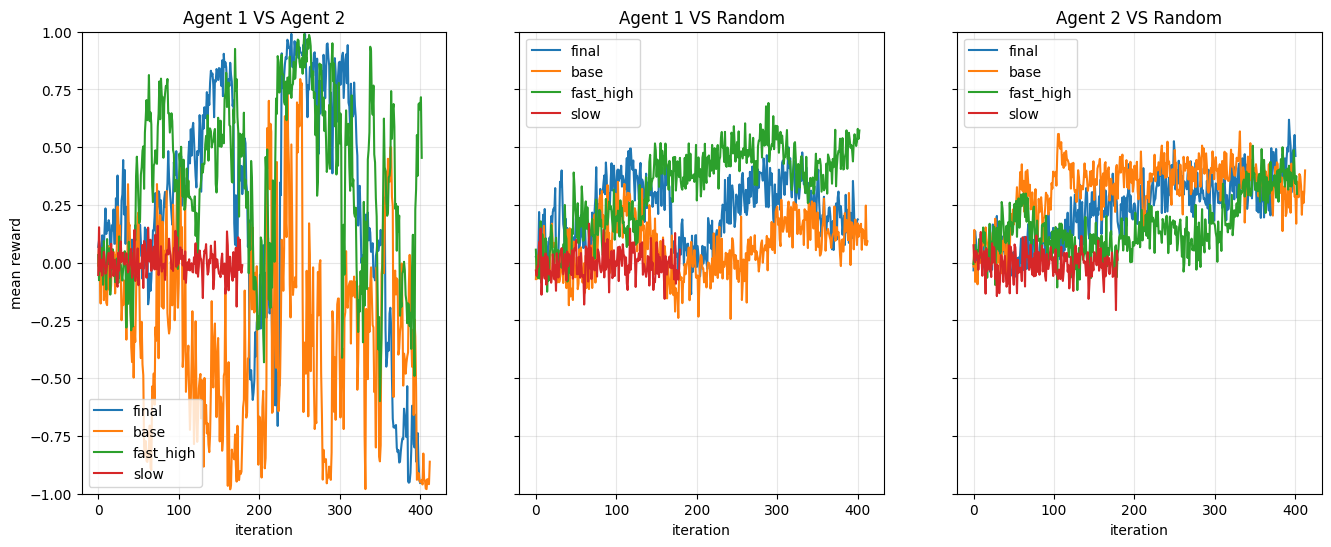

In [355]:
plot_rew([resf, res2, res_fast_high, res_slow_low], labels=["final", "base", "fast_high", "slow"])

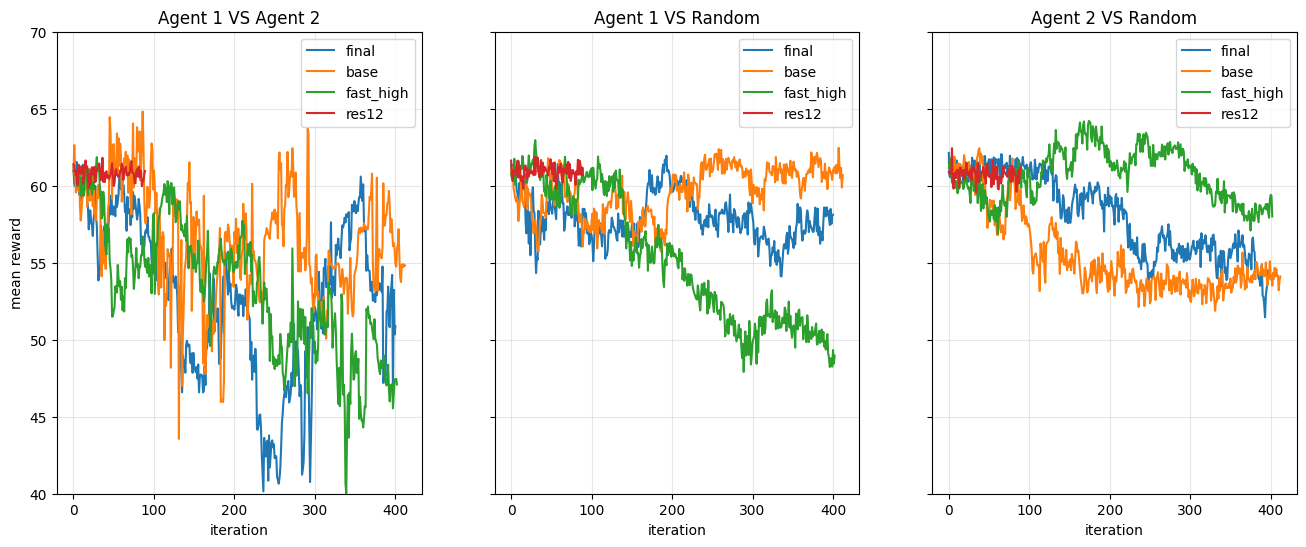

In [356]:
plot_turn([resf, res2, res_fast_high, res12], labels=["final", "base", "fast_high", "res12"])

C:\Users\andre\AppData\Local\Temp\ipykernel_4584\663087697.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


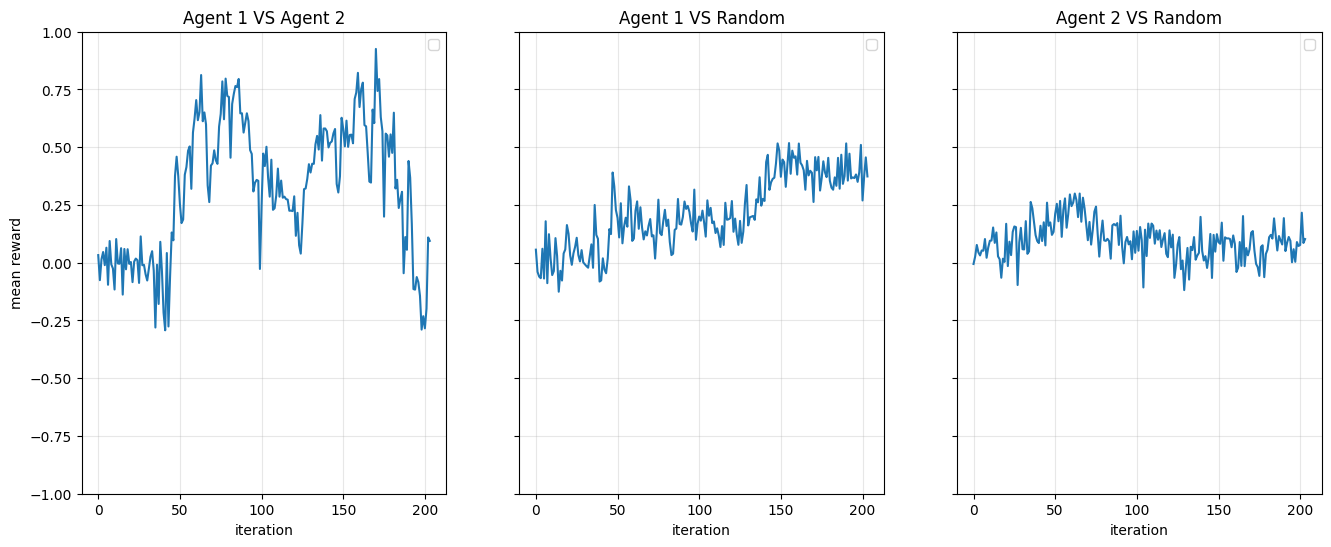

In [75]:
# fast learning high exploration
plot_rew([res_fast_high], labels=[""])

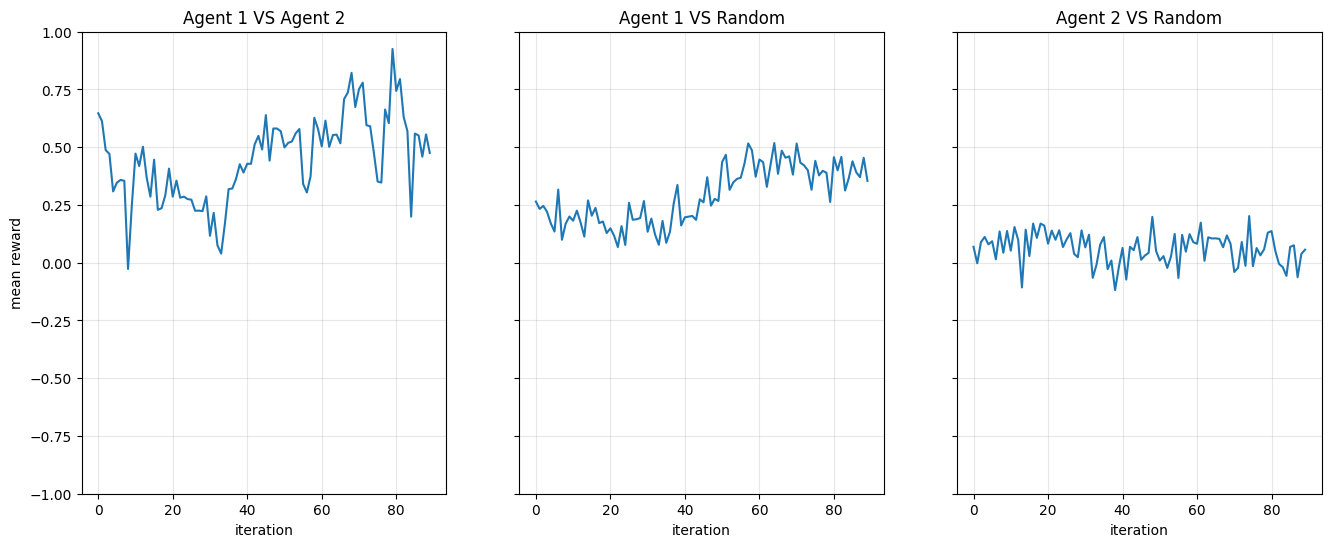

In [287]:
# slow learning low exploration
plot_rew(res10[2], res10[3], res10[4])

## plot victories

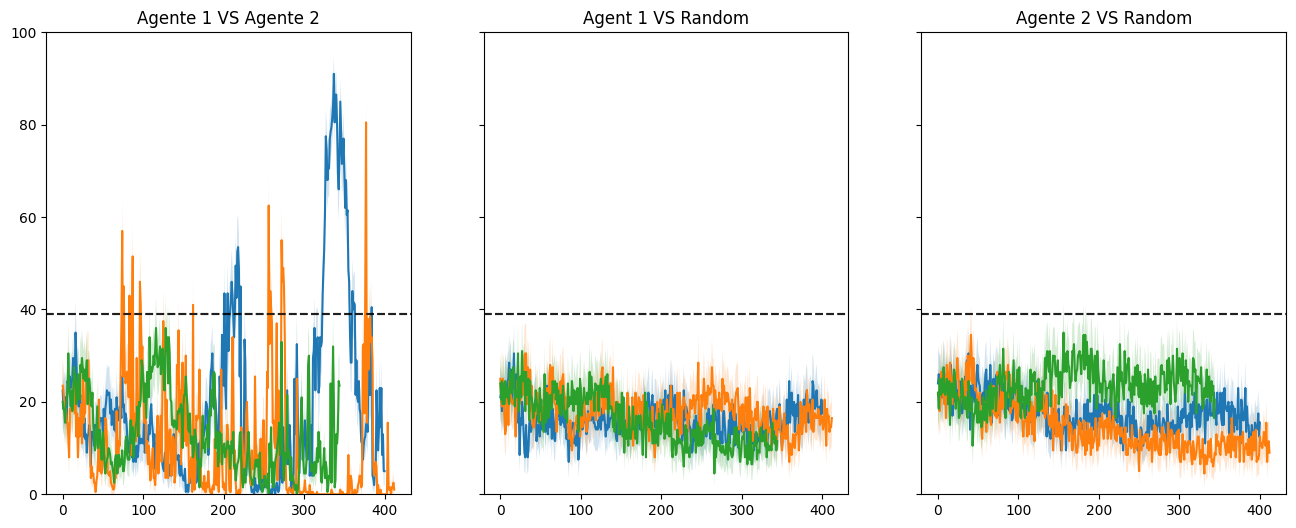

In [31]:
plot_comp([resf, res2, res_fast_high], mode="t")

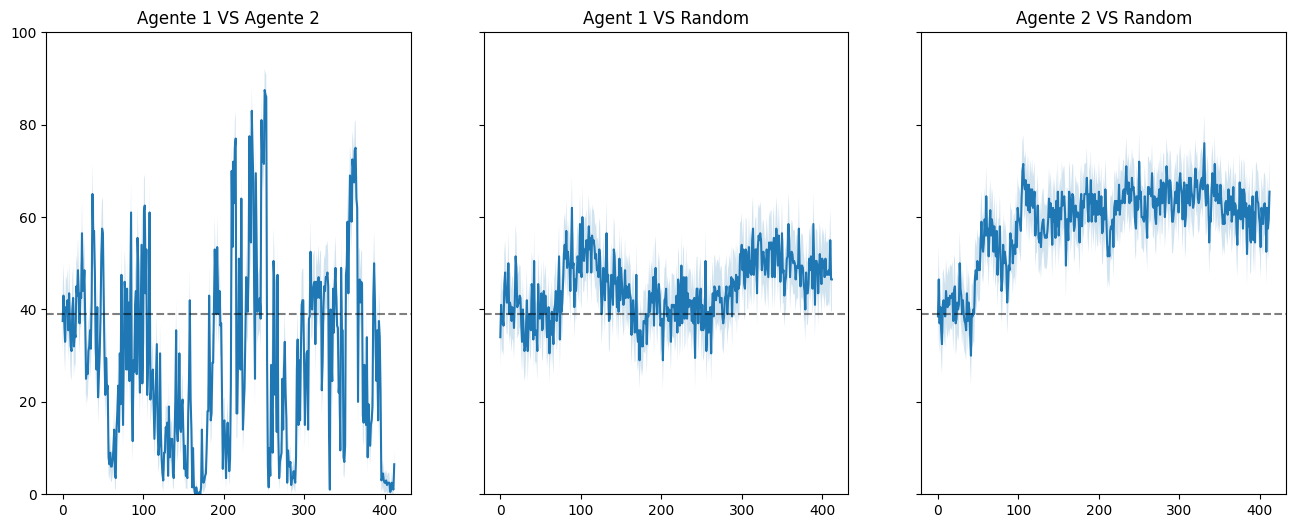

In [27]:
plot_comp(res2[2][:], res2[3][:], res2[4][:], mode="v")

In [158]:
res2[2]

[{'results': array([37.5, 39. , 23.5]),
  'rewards': array([ 1. , -1. , -1. ,  1. ,  1. , -0.1,  1. , -1. , -1. , -1. ,  0. ,
          0. ,  1. ,  0.3, -0.1, -1. ,  0.1,  1. , -1. ,  0.2,  1. , -1. ,
          1. ,  1. ,  1. ,  0.2, -1. , -1. ,  1. ,  1. ,  0.2,  1. ,  0. ,
          0. , -1. , -1. , -0.1,  1. ,  1. , -1. , -0.3,  1. , -1. , -0.1,
          1. , -1. ,  1. , -1. ,  1. , -1. ,  1. ,  0. , -1. , -1. ,  0. ,
          1. ,  0.1, -0.1, -1. ,  0. ,  1. , -1. ,  0. , -1. , -1. ,  1. ,
         -1. , -1. , -1. ,  1. , -1. ,  1. ,  1. ,  1. ,  0.1, -0.1,  1. ,
         -1. , -1. , -1. ,  1. , -1. ,  1. , -1. , -1. , -1. ,  1. , -1. ,
          0. ,  1. , -1. ,  1. ,  1. ,  1. , -1. ,  1. ,  1. , -1. ,  1. ,
         -1. ,  0.1,  1. ,  1. , -1. , -1. ,  1. ,  1. , -1. ,  1. ,  0. ,
         -1. , -0.1, -1. ,  1. , -1. , -1. ,  1. , -1. ,  1. ,  1. ,  1. ,
         -1. ,  0.2, -1. , -1. ,  1. , -1. , -1. ,  1. ,  1. ,  0. , -0.2,
          1. ,  1. , -1. , -1. , -1. , -1. ,  1. 

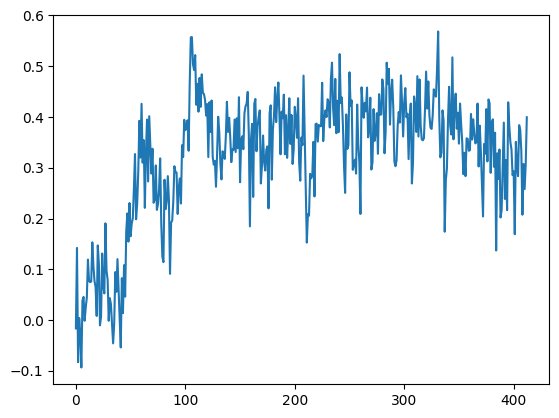

In [166]:
plt.plot(extract_reward_mean(res2, 4))

In [43]:
resf[4][0]

{'results': array([36.5, 39.5, 24. ]),
 'rewards': array([ 0.2,  1. ,  1. , -1. , -1. ,  1. ,  1. , -1. , -1. ,  1. , -1. ,
        -1. , -1. ,  1. ,  1. , -1. ,  0. , -0.2, -1. , -1. , -1. , -1. ,
         0. , -1. ,  1. , -1. ,  1. , -1. , -1. , -1. ,  0.1,  1. , -0.1,
        -0.2,  0. ,  0.2,  0.2, -1. , -1. , -1. , -1. , -1. ,  1. ,  0. ,
         1. , -0.2,  1. ,  1. , -0.1, -1. , -1. ,  1. ,  1. ,  0. , -1. ,
        -1. , -1. , -0.1,  1. , -1. ,  1. , -1. , -0.1, -1. ,  1. ,  0.1,
         0.1,  1. , -0.1,  1. ,  1. ,  1. ,  1. , -0.1,  1. ,  1. ,  0.2,
         1. , -1. , -1. , -1. ,  1. , -1. , -1. , -1. , -1. ,  0. ,  1. ,
         1. , -1. , -0.1,  1. , -1. , -0.1,  1. , -1. ,  0.2,  1. ,  1. ,
        -1. , -1. , -1. , -1. , -1. ,  1. , -0.1,  1. ,  1. ,  0.2, -0.2,
         0.1,  0.1, -1. ,  0. , -1. ,  1. ,  1. , -1. , -1. , -1. , -1. ,
         1. ,  1. , -1. ,  0. , -1. ,  1. ,  1. ,  1. ,  0.2, -1. ,  1. ,
         1. , -1. ,  1. , -1. ,  1. , -1. ,  1. , -1. ,  1. , 

In [40]:
resf[2][0]["rewards"].mean()

np.float64(0.0685)

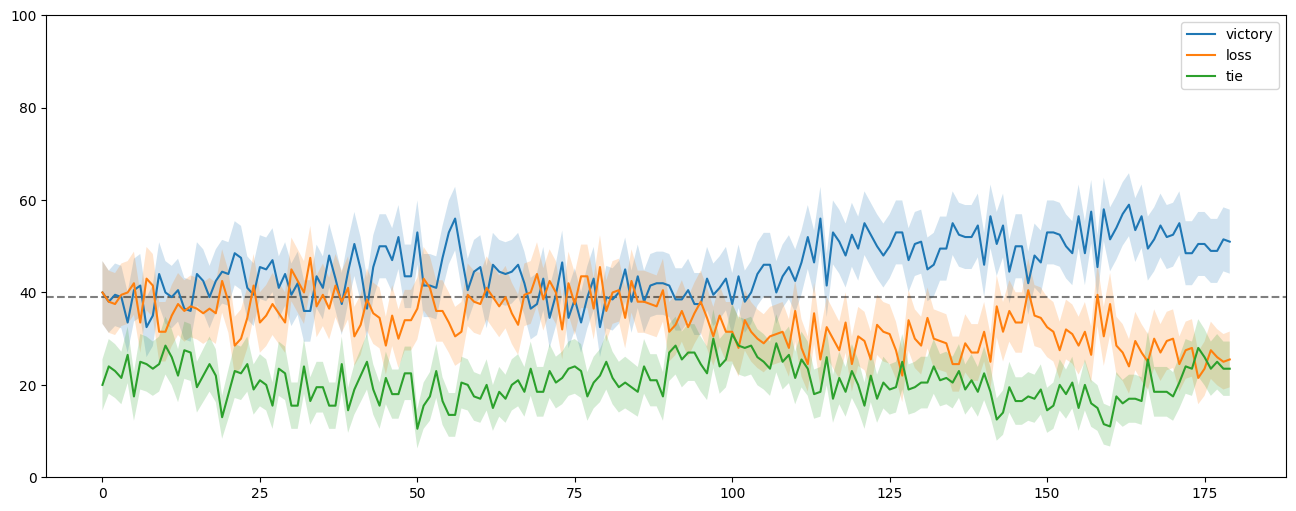

In [68]:
plot_val(res1[3], 200)

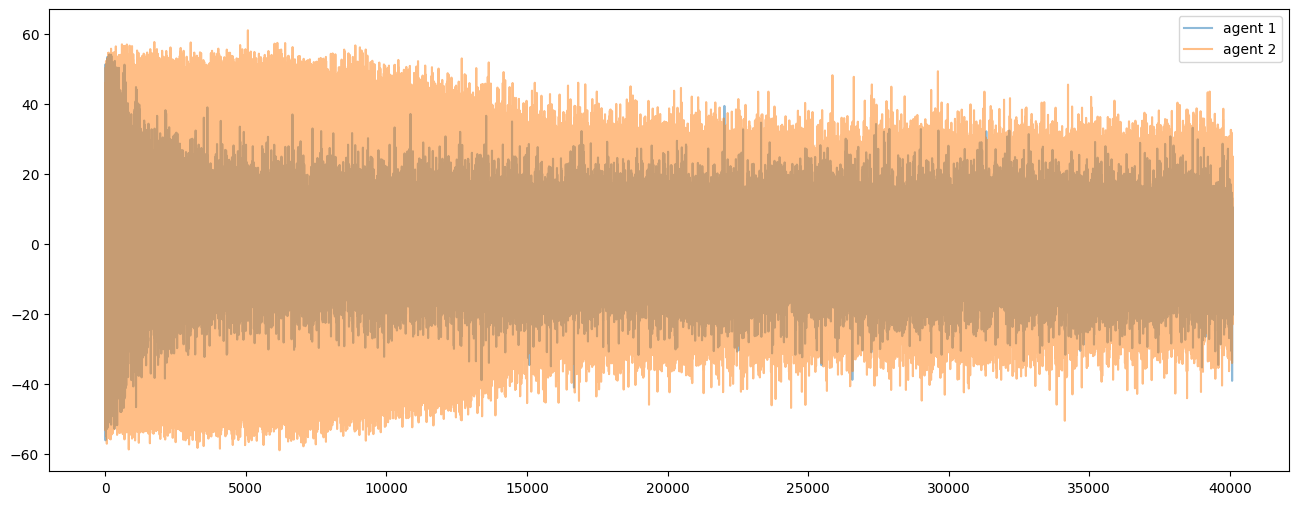

In [41]:
plt.figure(figsize=(16,6))
plt.plot(resf[0], label="agent 1", alpha=0.5)
plt.plot(resf[1], label="agent 2", alpha=0.5)
plt.legend()

# Stats

In [47]:
def build_env():
    env = ultimatetictactoe.env(render_mode="rgb_array")
    env.reset(42)
    return env

def build_a1(*args, **kwargs):
    eps = 0.3
    a1 = NeuralAgent("player_1", epsilon=eps, learning_power=6, exploration_power=2, exploration_const=1.7)
    a1.policy_net.load_state_dict(torch.load(r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_10_44_59\agent_1\model_6400.pt"))
    return a1

def build_a2(*args, **kwargs):
    eps = 0.3
    a2 = NeuralAgent("player_2", epsilon=eps, learning_power=10.5, exploration_power=1, exploration_const=0.9, learning_const=10)
    a2.policy_net.load_state_dict(torch.load(r".\rl\independent_algo\logs\checkpoints\long_run\2026_02_20_10_44_59\agent_2\model_6400.pt"))
    return a2

def build_ar(*args, **kwargs):
    return RandomAgent("")

In [49]:
a1.mode = 'sample'
a2.mode = 'sample'
print('12')
sample_12 = compute_games(env, a1, a2, 500, True, False)
print('1R')
sample_1r = compute_games(env, a1, ar, 500, True, False)
print('2R')
sample_2r = compute_games(env, a2, ar, 500, True, False)

12
1R
2R


In [52]:
# a1.mode = 'sample'
# a2.mode = 'sample'
print('12')
sample_12 = async_compute_games(build_env, build_a1, build_a2, n_games=500, n_processes=8, enable_swap=True, verbose=False)
print('1R')
sample_1r = async_compute_games(build_env, build_a1, build_ar, n_games=500, n_processes=8, enable_swap=True, verbose=False)
print('2R')
sample_2r = async_compute_games(build_env, build_a2, build_ar, n_games=500, n_processes=8, enable_swap=True, verbose=False)

12
[{'results': array([100.,   0.,   0.]), 'rewards': array([1.]), 'rewards_count': {1: 100.0}, 'game_turns': array([49.])}, {'results': array([  0.,   0., 100.]), 'rewards': array([0.]), 'rewards_count': {0.0: 100.0}, 'game_turns': array([58.])}, {'results': array([100.,   0.,   0.]), 'rewards': array([1.]), 'rewards_count': {1: 100.0}, 'game_turns': array([53.])}, {'results': array([  0., 100.,   0.]), 'rewards': array([-1.]), 'rewards_count': {-1: 100.0}, 'game_turns': array([70.])}, {'results': array([100.,   0.,   0.]), 'rewards': array([1.]), 'rewards_count': {1: 100.0}, 'game_turns': array([49.])}, {'results': array([  0.,   0., 100.]), 'rewards': array([0.1]), 'rewards_count': {0.1: 100.0}, 'game_turns': array([67.])}, {'results': array([100.,   0.,   0.]), 'rewards': array([1.]), 'rewards_count': {1: 100.0}, 'game_turns': array([57.])}, {'results': array([  0., 100.,   0.]), 'rewards': array([-1.]), 'rewards_count': {-1: 100.0}, 'game_turns': array([62.])}, {'results': array([

In [80]:
rrr = compute_games(env, ar, ar, 50000, True, False)

In [23]:
a1.mode = 'argmax'
a2.mode = 'argmax'
# print('12')
# argmax_12 = compute_games(env, a1, a2, 1000, True)
print('1R')
argmax_1r = compute_games(env, a1, ar, 500, True, False)
print('2R')
argmax_2r = compute_games(env, a2, ar, 500, True, False)

1R
2R


In [81]:
# sample
print(rrr['results'], rrr['rewards'].mean())
# print(sample_12['results'], np.array(sample_12['rewards']).mean())
# print(sample_1r['results'], np.array(sample_1r['rewards']).mean())
# print(sample_2r['results'], np.array(sample_2r['rewards']).mean())

[38.84  38.948 22.212] -0.0010999999999999992


In [25]:
# argmax
# print(rp['results'], rp['rewards'].mean())
print(argmax_1r['results'], argmax_1r['rewards'].mean())
print(argmax_2r['results'], argmax_2r['rewards'].mean())

[47.8 31.2 21. ] 0.174
[38.2 35.6 26.2] 0.03440000000000001


In [81]:
plot_bar(sample_1r)

NameError: name 'plot_bar' is not defined

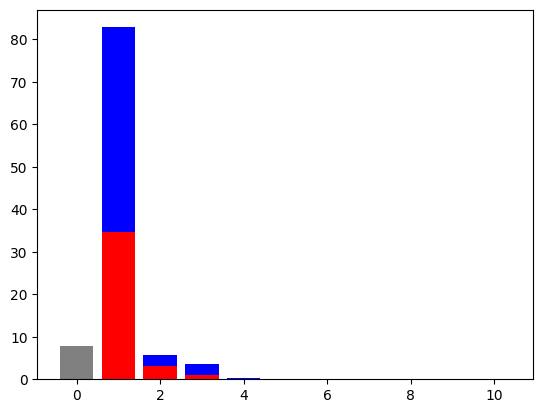

([0, 34.6, 3.2, 1.0, 0, 0, 0, 0, 0, 0, 0],
 [0, 48.2, 2.4000000000000004, 2.6, 0.2, 0, 0, 0, 0, 0, 0])

In [ ]:
plot_bar(argmax_2r)

In [53]:
confidence = 0.95
data = sample_1r['rewards']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, sem, ci

AttributeError: 'list' object has no attribute 'mean'

In [43]:
confidence = 0.95
data = argmax_1r['game_turns']
mean = data.mean()
sem = stats.sem(data)
ci = stats.t.interval(confidence, df=len(data)-1, loc=mean, scale=sem)
mean, ci

(np.float64(56.95),
 (np.float64(56.384551504844836), np.float64(57.51544849515517)))

In [ ]:
# n = 10000
# envh.metadata['render_fps'] = 2
# macro_result = np.zeros(3)
# result_by_reward = {}
# rew1 = 0
# rew2 = 0
# for _ in range(n):
#     r = compute_trajectory_against_random(env, ar, a2)
#     reward_1 = r['player_1']['rewards'][-1]
#     rew1 += r['player_1']['rewards'][-1]
#     rew2 += r['player_2']['rewards'][-1]
#     if reward_1 == 1:
#         macro_result[0] += 1
#     elif reward_1 == -1:
#         macro_result[1] += 1
#     elif reward_1 not in [1, -1]:
#         macro_result[2] += 1
#     if reward_1 not in result_by_reward.keys():
#         result_by_reward[reward_1] = 1
#     else:
#         result_by_reward[reward_1] += 1

# for k in result_by_reward.keys():
#     result_by_reward[k] *= 100/n

### Random results
Macro view
- probability of win 41% lose 36.6% tie 22.4%
- average reward difference +0.046
Probability of results
- 0 -> 7.4%
- +1 -> 41% / -1 -> 36.56%
- 0.1 -> 5.28% / -0.1 -> 4.7%
- 0.2 -> 2.36% / -0.2 -> 2%
- 0.3 -> 0.3% / -0.3 -> 0.22%
- 0.4 -> 0.054% / -0.4 -> 0.038%
- 0.5 -> 0.001%
- 0.6 -> 0.001%

In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [48.03 27.67 24.3 ]
average reward 0.20818999999999965
full result {1: 48.03, -0.1: 4.97, -1: 27.67, 0.0: 8.0, 0.1: 6.43, -0.2: 1.69, 0.2: 2.5300000000000002, -0.30000000000000004: 0.08, 0.30000000000000004: 0.47000000000000003, 0.4: 0.1, -0.4: 0.03}


In [ ]:
print(f"macro results -> {macro_result * 100 / n}")
print(f"average reward {rew1/n}")
print(f"full result {result_by_reward}")

macro results -> [41.78 36.29 21.93]
average reward 0.05403999999999998
full result {1: 41.78, 0.0: 7.22, 0.1: 5.03, -1: 36.29, -0.30000000000000004: 0.34, -0.2: 2.24, 0.2: 2.02, -0.1: 4.8500000000000005, 0.30000000000000004: 0.18, -0.4: 0.04, 0.4: 0.01}


In [ ]:
np.array(env.board.cells).reshape(9, 9)

array([[2, 2, 1, 1, 2, 2, 2, 1, 1],
       [1, 1, 1, 2, 2, 1, 2, 2, 0],
       [2, 2, 1, 1, 1, 2, 1, 1, 2],
       [1, 2, 0, 2, 0, 1, 1, 1, 2],
       [0, 1, 2, 2, 1, 2, 0, 2, 0],
       [1, 1, 2, 1, 2, 2, 2, 2, 0],
       [2, 1, 2, 1, 2, 1, 1, 1, 2],
       [1, 1, 2, 1, 0, 1, 2, 1, 1],
       [1, 2, 2, 2, 2, 1, 2, 1, 1]])

In [ ]:
env.board.sub_boards[0]

[[2 2 1]
 [1 1 1]
 [2 2 1]]

# Visualize activations

In [341]:
a1.mode = "sample"
a2.mode = "sample"
a1.disable_epsilon(True)

In [342]:
# get data
a1.eval()
a2.eval()
envh.metadata['render_fps']=50
TR = Trajectory(envh, ar, ar)
TR.compute(max_turn=40)
envh.render()

In [343]:
# envh.save_snapshot("tie.png")

In [344]:
state, _, _, _, _ = envh.last()
data = state_to_tensor(state)

activations = {}
def get_activations(name):
    """Create hook function for layer given"""
    def hook(model, input, output):
        activations[name] = output.detach()
    return hook

model = a1.policy_net

In [345]:
model

Policy(
  (first_conv_net): Sequential(
    (0): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(0, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): BatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (second_conv_net): Sequential(
    (0): Conv2d(0, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.1, inplace=False)
    (4): Conv2d(0, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (5): BatchNorm2d(0, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
  )
  (main_linear): Sequential(
    (0): Dropout(p=0.1, inplace=False)
    (1): Flatten(start_dim=1, end_dim=-1)
    (2): Linear(in_features=5184, out_features=500, bias=Tr

In [346]:
model.first_conv_net[0].register_forward_hook(get_activations("second_conv_net.4"))
model.main_linear[5].register_forward_hook(get_activations("linear"))
model.final_linear.register_forward_hook(get_activations("final"))
# model.first_conv_net[5].register_forward_hook(get_activations("conv5"))
output = model(data)

In [347]:
# act = activations["second_conv_net.4"]
act = activations["linear"]

In [331]:
act.shape

torch.Size([1, 81])

In [332]:
# a = [torch.ones((1, 16, 3, 3))*i for i in range(9)]
# x = torch.stack(a, dim=1).view(1, 3, 3, 16, 3, 3)
# x = x.permute(0, 3, 1, 4, 2, 5).reshape(1, 16, 9, 9)
# x.shape

In [333]:
from utils.plot_utils import plot_decision

In [334]:
output.reshape(9, 9)

tensor([[0.0000e+00, 0.0000e+00, 7.6777e-05, 5.9819e-20, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0727e-17, 2.3997e-19, 0.0000e+00, 0.0000e+00, 2.4382e-13, 3.3702e-16,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 6.3740e-19, 8.3873e-12, 0.0000e+00, 1.0965e-17, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.7685e-14, 0.0000e+00, 3.2673e-15, 5.2598e-12, 5.1213e-19,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [4.7877e-22, 6.8978e-17, 1.3193e-19, 2.6938e-17, 0.0000e+00, 0.0000e+00,
         5.2073e-18, 9.5607e-16, 1.8036e-20],
        [0.0000e+00, 4.9717e-08, 0.0000e+00, 1.4024e-17, 0.0000e+00, 0.0000e+00,
         5.6241e-21, 3.3298e-12, 0.0000e+00],
        [5.8205e-10, 0.0000e+00, 9.9991e-01, 1.8564e-18, 1.6412e-20, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.3430e-13, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.0484e-15,
         0.0000e+00, 0.0000e+0

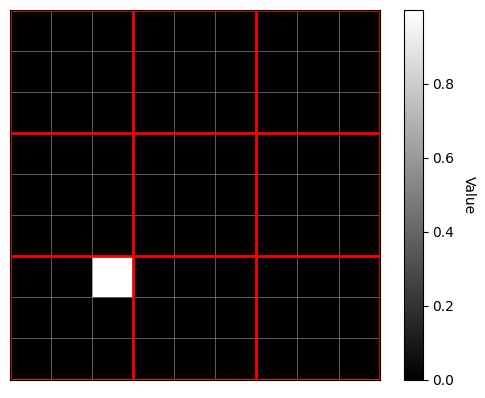

In [335]:
plot_decision(output)

In [336]:
act

tensor([[ 4.0550, 10.9299,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000, 21.2640,  0.0000,  0.0000,  0.0000,  0.0000,  0.9068, 22.3717,
          4.4242,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  9.0514,  0.0000,
         13.0589,  0.0000,  0.0000,  3.1494,  8.8314,  4.7513,  0.0000, 16.0359,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000, 28.8321,  0.0000,  0.0000, 18.0630,
          0.0000,  0.0000,  0.0000,  5.5364,  9.9459,  9.2069,  0.0000,  0.0000,
          0.0000,  6.8386,  7.6777,  5.1770, 16.1276,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  5.3734,  0.0000,
          0.0000,  0.0000,  2.3643,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         11.9835]])

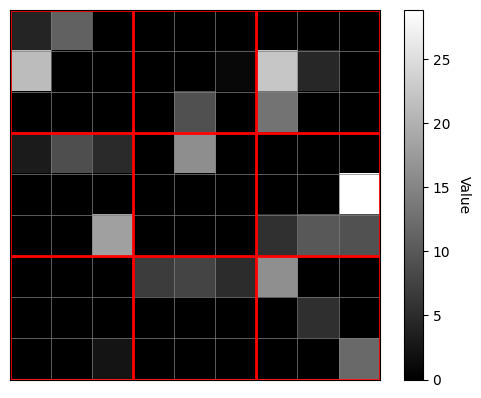

In [338]:
plot_decision(act.reshape(9, 9))